In [1]:
from functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("H:\FantasyMachineLearning\FantasyFootballMachineLearning\FantasyFootballData.csv")
data = data.fillna(0)

In [3]:
subset = data.drop(columns = ['Year', 'Name', 'Team', 'Passing Yds', 'Passing TD', 'Passing Int',
       'Rushing Yds', 'Rushing TD', 'Receiving Yds', 
       'Receiving TD', 'PPR', 'Fantasy Rank'])
y = subset['Points']
x = subset.drop(columns = ['Position','Points'])

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 88)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=88)

In [5]:
# Calculated Predictions Based on Random Forest
predictions = rf.predict(x_test)
# Retreive Model Metrics
modeleval(predictions,y_test)

,rmse,r^2,mae,mape,accuracy
0,14.777477,0.954451,9.06,14.472712,85.527288


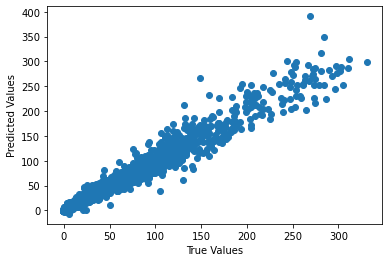

In [6]:
plt.scatter(predictions,y_test)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

Applying my model to the 2019 Season and comparing the difference between predictive values and actual values

In [7]:
data2019 = pd.read_csv('H:/FantasyMachineLearning/FantasyFootballMachineLearning/2019season.csv')
data2019 = data2019.fillna(0)

In [8]:
subset_2019 = data.drop(columns = ['Year', 'Name', 'Team', 'Passing Yds', 'Passing TD', 'Passing Int',
       'Rushing Yds', 'Rushing TD', 'Receiving Yds', 
       'Receiving TD', 'PPR', 'Fantasy Rank'])
y = subset_2019['Points']
x = subset_2019.drop(columns = ['Position','Points'])

In [9]:
predictions_2019 = rf.predict(x)
modeleval(predictions_2019,y)

,rmse,r^2,mae,mape,accuracy
0,8.91842,0.984015,4.79,7.90563,92.09437


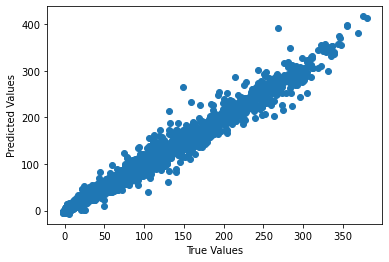

In [10]:
plt.scatter(predictions_2019,y)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [11]:
predpoints = pd.DataFrame(predictions_2019, columns = ["PredictedPoints"])
points_comparion = pd.concat([predpoints,y], axis = 1)
points_comparion.head(10)

,PredictedPoints,Points
0,375.732,417.0
1,336.000,354.0
2,338.672,341.0
3,335.580,332.0
4,311.121,327.0
5,286.118,313.0
6,310.413,313.0
7,290.704,310.0
8,295.982,304.0
9,253.168,298.0
